In [45]:
import numpy as np
import cv2 
import matplotlib as plt
from sklearn.feature_extraction.image import extract_patches_2d

In [55]:
def extract_saliency(img):
    n_H, n_W, n_channel = img.shape
    W_R2 = min(n_H,n_W)/8
    N2 = W_R2**2
    print(W_R2)
    integral_img = cv2.integral(im)
    saliency_map = np.zeros((n_H,n_W))
    for i in range(W_R2,n_H-W_R2):
        for j in range(W_R2, n_W-W_R2):
            tmp = 1.0*(integral_img[i-W_R2,j-W_R2,:] + integral_img[i+W_R2,j+W_R2,:] - (integral_img[i-W_R2,j+W_R2,:] + integral_img[i+W_R2,j-W_R2,:]))/N2
            saliency_map[i,j] = np.linalg.norm(img[i,j,:]-np.array(tmp))
    return saliency_map


(428, 641, 3)


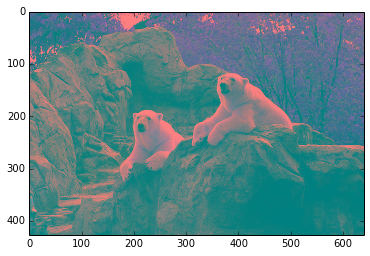

In [56]:
image = cv2.imread("MSO/img/COCO_COCO_train2014_000000001737.jpg")
im = cv2.cvtColor(image,cv2.COLOR_BGR2LAB)
%matplotlib inline
plt.pyplot.imshow(im)
i_im = cv2.integral(im)
print(i_im.shape)

In [57]:
s = extract_saliency(im)
print(s.shape)


53
(427, 640)


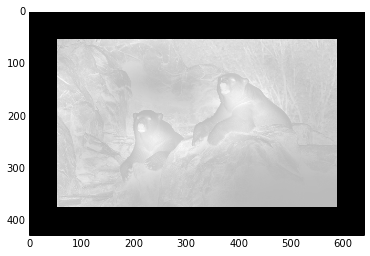

In [58]:
plt.pyplot.imshow(s,cmap='gray')